<h1> Introduction to Music21

This notebook is a summary of the documentation of the first chapters in the <a href="http://web.mit.edu/music21/doc/usersGuide/usersGuide_01_installing.html"> music21 documentation </a>.

As the first chapters of the aforementioned document go over basic operations within the music21 framework, the results will be summarized in a single notebook.

please note: the official music21 documentation is not based on using Jupyter or the Jupyterhub, so we will have to make some amendments to the code, where applicable.

**Author of the notebook:** Sebastian Klassmann, Systematic Musicology, University of Cologne
**Last change:**            July 6th, 2018

*All credit for the instructional materials below goes to the Massachusetts Institute of Technology (MIT) and the team behind music21. The author of this notebook has mereley put the documentation in an interactive (jupyter) format and checked it's functionality within the jupyterhub environment currently used at the above instution.*

<h2> Chapter 1 : Intallation </h2>

As we already have a working installation of music21 on our jupyterhub, we are free to skip the respective steps in <a href="http://web.mit.edu/music21/doc/usersGuide/usersGuide_01_installing.html"> here</a>.

In [1]:
# this first cell is neccessary to access the functions within music21.
# basically, we import music21 and set all the paths correctly, so our notation output via MuseScore2 works
# correctly:

from music21 import *

# neccessary environment variables for other users than 'sfk':
# environment.keys()
# environment.set('musicxmlPath', value='/usr/bin/musescore-xvfb')
# environment.set('musescoreDirectPNGPath', value='/usr/bin/musescore-xvfb')

as a first step, we will be declaring a variable "s" and we will be referencing it to a piece stored within
music21's corpus of musical examples.

we will then run a simple analysis function on it and show the piece as notation.

In [2]:
s = corpus.parse('bach/bwv65.2.xml')
s.analyze('key')

<music21.key.Key of a minor>

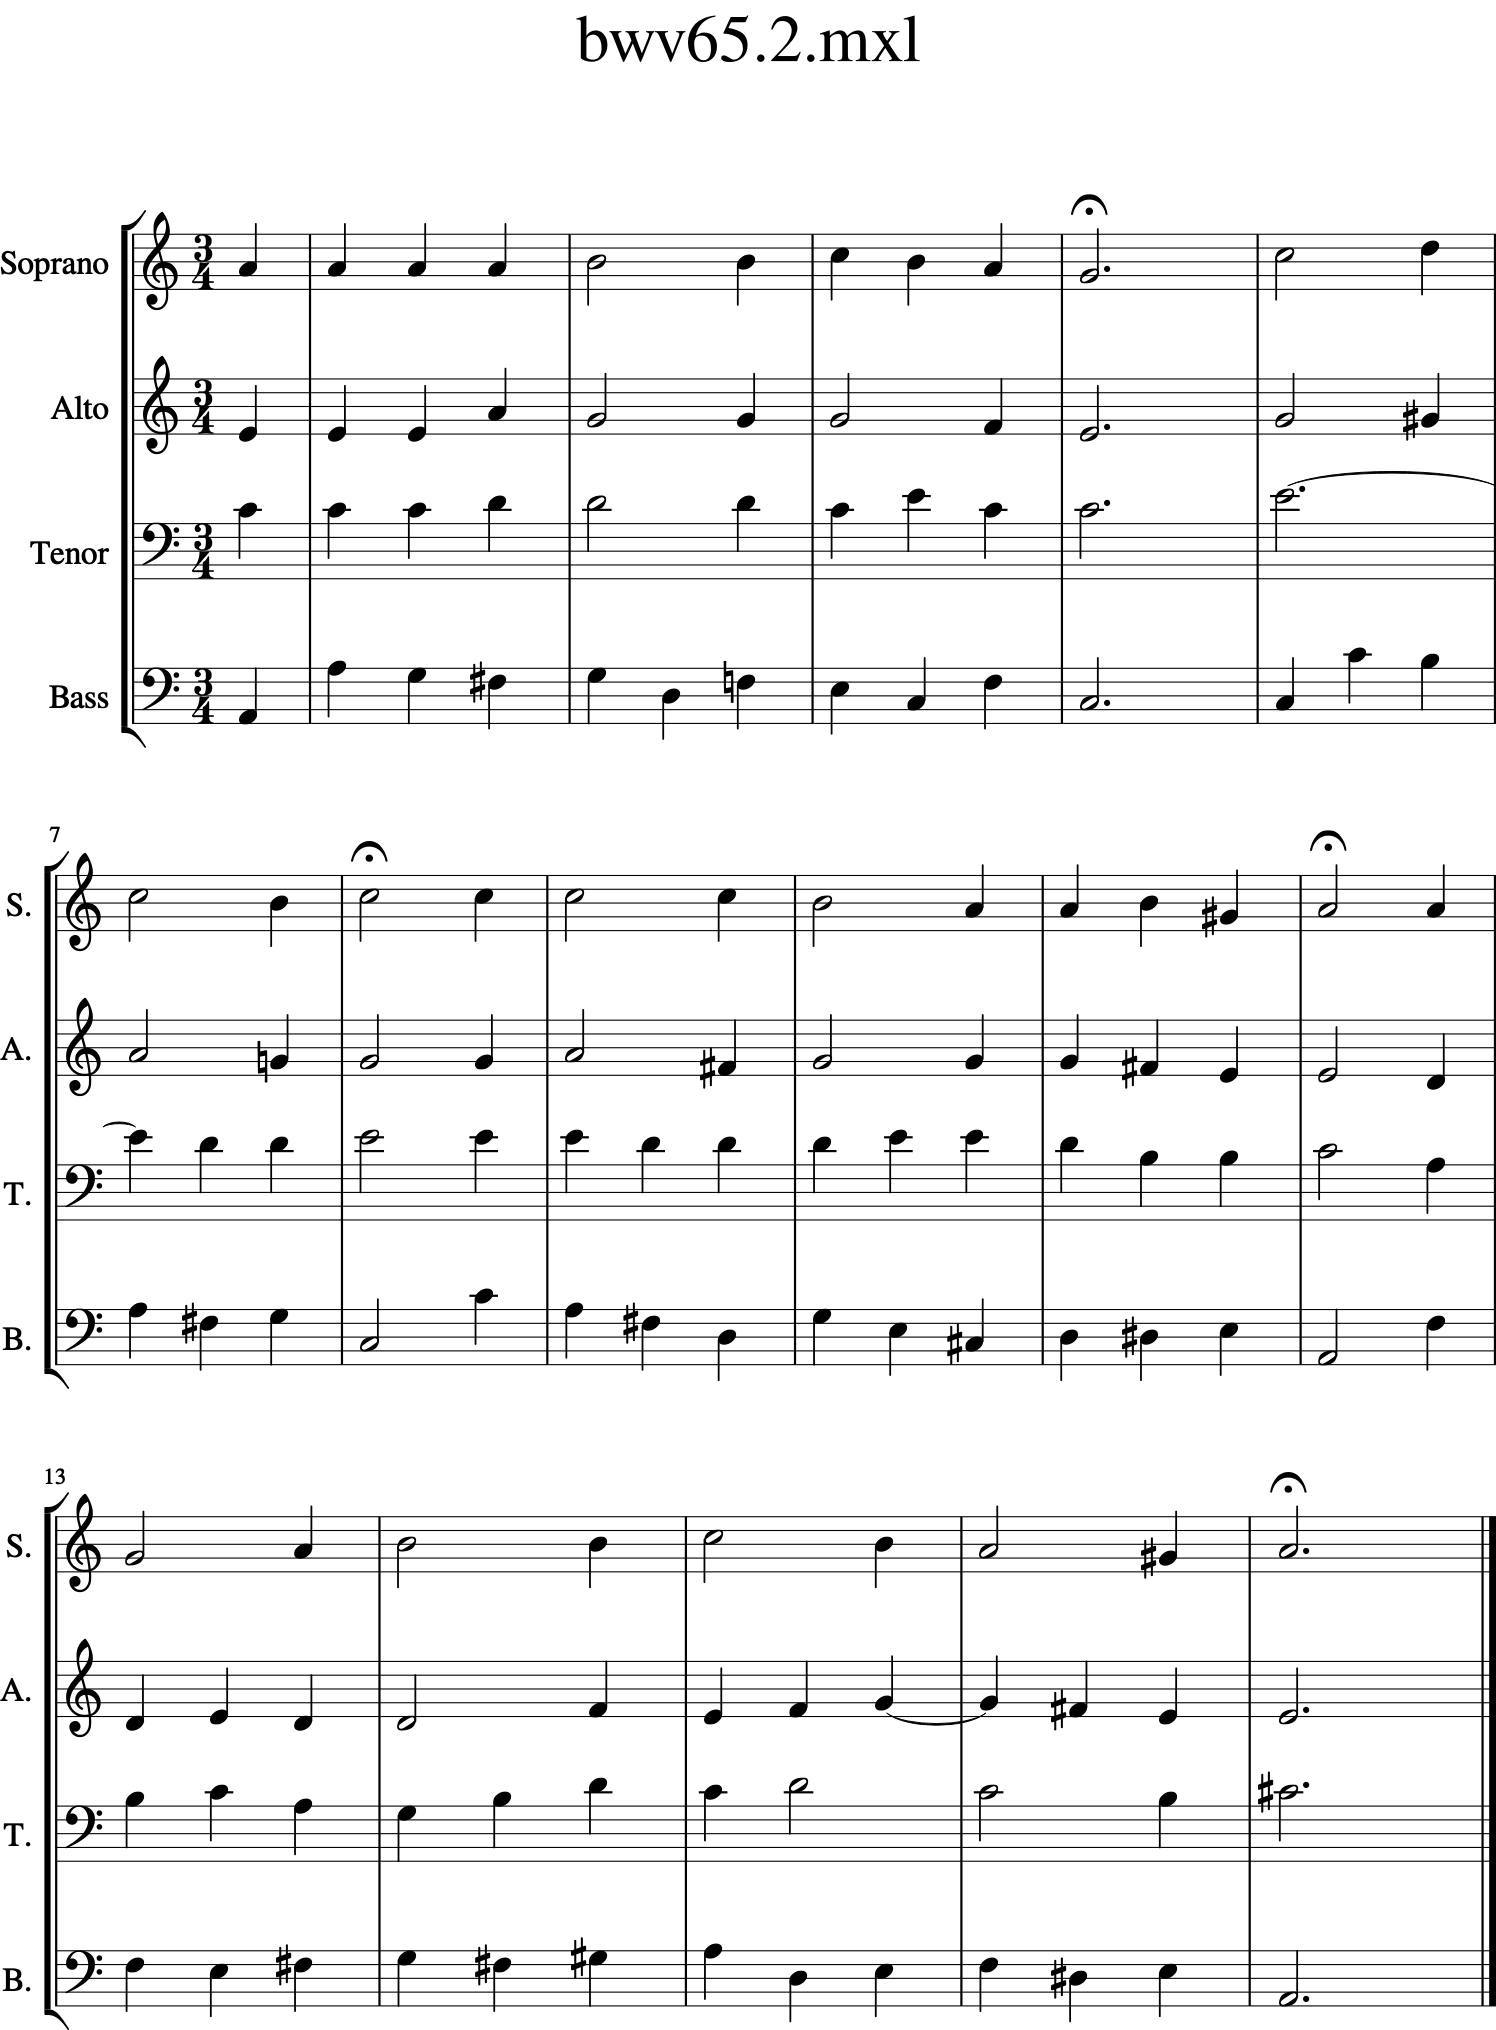

In [3]:
# and now, we can actually display the piece in notated form:
s.show()

<h2> Chapter 2: Notes </h2>

Notated music, by its very name, consists of a bunch of notes that are put one after another or simultaneously on a staff. There are other things, clefs, key signatures, slurs, etc. but the heart of music is the notes; so to get anywhere in music21 you’ll need to know what the toolkit thinks about notes and how to work with them.

Go ahead and start IDLE or type “python” at the command line (Terminal on the Mac or “run: cmd” on Windows) and let’s get started.

<h3> Creating and working with Notes </h3>

The music21 concept of a standard note is contained in the Note object, which is found in the note module.
Read this if you’re new to Python (others can skip ahead): Notice the difference between object names and module names. Modules, which can contain one, many, or even zero objects, always begin with a lowercase letter. Music21’s objects always begin with a captial letter. So the Note object is found in the note module. The distinction between uppercase and lowercase is crucial to Python: if you type the name of an object with the wrong case it won’t know what to do and won’t give you any help in distinguishing between them.

In the note module, there are other classes besides note.Note. The most important one is note.Rest, which as you imagine represents a rest. If we load music21 with the command

In [4]:
# from music21 import *
# we already did that above, so no need to do it again :-)

then you’ll now be able to access the note module just by typing note at any command line.

In [5]:
note

<module 'music21.note' from '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/music21/note.py'>

If you get something like this you’ll have access to the music21 note module any time you type "note". The filename after “from ‘D:\music21files…’” will differ for you. It will show you where you have music21 installed (if you ever forget where you have music21 installed, this is an easy way to figure it out).
As long as it ends in note.pyc or note.py or something like that you’re fine.
If you want to know what else the note module contains besides the Note and Rest objects you can type “dir(note)” to find out:

In [6]:
dir(note)

['GeneralNote',
 'Lyric',
 'LyricException',
 'NotRest',
 'NotRestException',
 'Note',
 'NoteException',
 'Rest',
 'SpacerRest',
 'Test',
 'TestExternal',
 'Unpitched',
 '_DOC_ORDER',
 '_MOD',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'base',
 'beam',
 'common',
 'copy',
 'duration',
 'environLocal',
 'environment',
 'exceptions21',
 'expressions',
 'interval',
 'noteheadTypeNames',
 'pitch',
 'stemDirectionNames',
 'style',
 'tie',
 'unittest',
 'volume']

Some of the things in this list are classes of notes – they are capitalized. Other classes are things that we’ll get to later, like Lyric objects. (By the way: I’m highlighting the names of most objects so they become links to the full documentation for the object. You can read it later when you’re curious, frustrated, or Mad Men is a re-run; you certainly don’t need to click them now).

(Advanced digression):

If you’re more of a Python guru and you’re afraid of “polluting your namespace,” instead of typing “from music21 import *” you can type:

import music21

in which case instead of using the word note, you’ll need to call it music21.note

In [7]:
import music21
music21.note

<module 'music21.note' from '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/music21/note.py'>

If you are a Python guru, you already knew that. Probably if you didn’t already know that, but you’ve heard about “polluting your namespace,” you have a Python guru friend who has screamed, “Never use import *!” Trust me for now that this tutorial will be easier if you ignore your friend for a bit; by the end of it you’ll know enough to be able to follow whatever advice seems most natural to you.
(Back from the Python digression and especially the digression of the digression):

Okay, so now you now enough about modules and objects. Let’s create a note.Note object. How about the F at the top of the treble clef staff:

In [8]:
f = note.Note("F5")

We use the convention where middle-C is C4, the octave above it is C5, etc.
Now you have a Note. Where is it? It’s stored in the variable f. You can verify this just by typing f:

In [9]:
f

<music21.note.Note F>

And you can see that it’s actually an F and actually in octave 5 by requesting the .name and .octave attributes on the Note object, f:

In [10]:
f.name

'F'

In [11]:
f.octave

5

And there’s an attribute called .pitch which returns another object:

In [12]:
f.pitch

<music21.pitch.Pitch F5>

Well, that didn’t tell you anything you didn’t know already! Let’s look at some other attributes that might tell you something you didn’t know. Some of them are sub-attributes, meaning they take two dots. Here’s a sub-attribute on pitch, which we just said was itself an object, called .frequency:

In [13]:
f.pitch.frequency

698.456462866008

And another sub-attribute called pitch.pitchClassString

In [14]:
f.pitch.pitchClassString

'5'

That’s a bit better! So an f is about 698hz (if A4 = 440hz), and it is pitch class 5 (where C = 0, C# and Db = 1, etc.).

A couple of things that you’ll notice:

Your frequency probably has a bunch more numbers instead of ending with “…”. Mine gives me “698.456462866008”. In the docs, we’ll sometimes write “…” instead of putting in all those numbers (or long strings); it’s partly a way of saving space, and also because the length of a long number and even the last few digits will differ from computer to computer depending on whether it’s 32-bit or 64-bit, Mac or PC, number of sunspots last Autumn, etc. Since I don’t know what computer you’re using, don’t worry if you get slightly different results.

There are single quotes around some of the output (like the 'F' in f.name) and none around others (like the 5 in f.octave). The quotes mean that that attribute is returning a String (a bunch of letters or numbers or simple symbols). The lack of quotes means that it’s returning a number (either an integer or if there’s a decimal point, a sneakingly decimal-like thingy called a float (or “floating-point number”) which looks and acts just like a decimal, except when it doesn’t, which is never when you’d expect.

(The history and theory behind floats will be explained to you at length by any computer scientist, usually when he or she is the only thing standing between you and the bar at a party. Really, we shouldn’t be using them anymore, except for the fact that for our computers they’re so much faster to work with than decimals.)
The difference between the string '5' and the number 5 is essential to keep in mind. In Python (like most modern programming languages) we use two equal signs (==) to ask if two things are equal. 

So:

In [15]:
f.octave == 5

True

That's what we'd expect. But now, try:

In [16]:
f.pitch.pitchClassString == 5

False

That’s because 5 == '5' is False. (There are some lovely languages such as JavaScript and Perl where it’s True; Python’s not one of them. This has many disadvantages at first, but as you go on, you might see this as an advantage). So to see if f.pitchClassString is '5' we need to make '5' a string by putting it in quotes:

In [17]:
f.pitch.pitchClassString == "5"


True

In Python it doesn’t matter if you put the 5 in single or double quotes:

In [18]:
f.pitch.pitchClassString == '5'

True

pitchClassString tells you that you should expect a string, because we’ve put it in the name. There’s also a .pitch.pitchClass which returns a number:

In [19]:
f.pitch.pitchClass

5

These two ways of getting a pitch class are basically the same for the note “F” (except that one’s a string and the other is an integer) but for a B-flat, which is .pitchClass 10 and .pitchClassString “A”, it makes a difference.
Let’s go ahead and make that B-flat note. In music21, sharps are “#” as you might expect, but flats are “-“. That’s because it’s otherwise hard to tell the difference between the Note “b” (in this instance, you can write it in upper or lower case) and the symbol “flat”. So let’s make that B-flat note:

In [20]:
bflat = note.Note("B-2")

I’ve called the variable “bflat” here. You could call it “Bb” if you want or “b_flat”, but not “b-flat” because dashes aren’t allowed in variable names:

In [21]:
b-flat = note.Note("B-2")

SyntaxError: can't assign to operator (<ipython-input-21-d519b3e88921>, line 1)

Since this note has an accidental you can get it by using the .pitch.accidental subproperty:


In [22]:
bflat.pitch.accidental

<accidental flat>

Here we have something that isn’t a number and doesn’t have quotes around it. That usually means that what .accidental returns is another object – in this case an Accidental object. As we saw above, objects have attributes (and other goodies we’ll get to in a second) and the Accidental object is no exception. So let’s make a new variable that will store bflat’s accidental:

In [23]:
acc = bflat.pitch.accidental

We’ll get to all the attributes of Accidental objects in a bit, but here are two of them: .alter and .displayLocation. You’ll use the first one quite a bit: it shows how many semitones this Accidental changes the Note:

In [24]:
acc.alter

-1.0

Since this Accidental is a flat, its .alter is a negative number. Notice that it’s also not an integer, but a float. That might indicate that music21 supports things like quarter-tones, and in this case you’d be right.
Look back at the two lines “acc = bflat.pitch.accidental” and “acc.alter”. We set acc to be the value of bflat.pitch’s .accidental attribute and then we get the value of that variable’s .alter attribute. We could have skipped the first step altogether and “chained” the two attributes together in one step:

In [25]:
bflat.pitch.accidental.alter

-1.0

In [26]:
acc.displayLocation

'normal'

Good to know that we’ve set a sensible default. If you want to have the accidental display above the note, you’ll have to set that yourself:

In [27]:
acc.displayLocation = 'above'
acc.displayLocation

'above'

Python is one of those cool computer languages where if an object doesn’t have a particular attribute but you think it should, you can add it to the object (some people find that this makes objects messy, but I don’t mind it). For what I hope are obvious reasons, the Note object does not have an attribute called “wasWrittenByStockhausen”. So if you try to access it, you’ll get an error:

In [28]:
bflat.wasWrittenByStockhausen

AttributeError: 'Note' object has no attribute 'wasWrittenByStockhausen'

But if you set the value of that weird attribute, you can use it later:


In [29]:
bflat.wasWrittenByStockhausen = True
f.wasWrittenByStockhausen = False

Then you can write an “if” statement to see if this is True or not:

In [30]:
if bflat.wasWrittenByStockhausen == True:
    print("Hope you're enjoying Sirius!")

Hope you're enjoying Sirius!


Note that in the last line above you will need to put the spaces before the “print” command; Python uses spaces to keep track of what is inside of an if statement (or lots of other things) and what isn’t.
(If you don’t get the Stockhausen joke, see: wikipedia . )
Nothing will print for the note f since we set .wasWrittenByStockhausen to False:

In [31]:
if f.wasWrittenByStockhausen == True:
    print("I love Helicopters!")

At this point you might be tired of all this programming and just want to see or play your damn note! If you’ve installed a MusicXML reader such as MuseScore, Finale, Sibelius, or Finale Notepad, you can type:

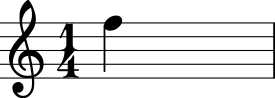

In [32]:
f.show()

and see it. We make the default note length a quarter-note. We’ll get to other note lengths in a minute. Notice that we put in a sensible clef also, since otherwise you won’t know that this note really is F5.

**please note**: As of now, our Jupyterhub system is yet unable to play back MIDI. A fix is in the making. However, Midi playback via "show.midi()" will work flawlessly with any local installation of jupyter notebook and music21.

When we typed f.octave we didn’t put any parentheses after it, but when we call f.show() we always need to put parentheses after it, even if there’s nothing in them (in which case, we’ll use the default .show format, which is usually musicxml).

.show() is what’s called a **method** on the Note object, while .octave is an attribute. Think of methods as like verbs (“O Note: show thyself!”) while attributes are like adjectives that describe the object. All methods need to have parentheses after them and inside the parentheses you can usually put other things (“parameters”) that control how to perform the action. For instance, let’s create a new note, D by transposing our B-flat up a major-third (“M3”):

In [33]:
d = bflat.transpose("M3")
d

<music21.note.Note D>

In [34]:
bflat

<music21.note.Note B->

Instead of changing the original note, the transpose() method **“returns”** (that is, spits out) a new note.Note object that represents the operation of transposing it up (or down if you want to try “-M3”) a certain interval.

If you want to change bflat itself, you can add “inPlace = True” to the parameters of .transpose() separating it from the interval by a comma. Let’s take it up a perfect fourth:


In [35]:
bflat.transpose("P4", inPlace=True)
bflat

<music21.note.Note E->

Of course now bflat is a terrible name for our variable! You could type “eflat = bflat” and now you can call the note eflat. But you’ll probably not need to do this too often. By the way, music21 handles some pretty wacky intervals, so if we go back to our variable d (which is still a d – transposing bflat in place didn’t change it; they’re not connected anymore, barely on speaking terms even), let’s transpose it up a doubly-diminished sixth:

In [36]:
whatNoteIsThis = d.transpose('dd6')
whatNoteIsThis

<music21.note.Note B--->

B-triple-flat! Haven’t seen one of those in a while! Let’s check that note’s .pitch.accidental.alter and its .pitch.accidental.name. These are sub-sub-properties, meaning that they have three dots in them:

In [37]:
whatNoteIsThis.pitch.accidental.alter

-3.0

In [38]:
whatNoteIsThis.pitch.accidental.name

'triple-flat'

One last thing: not every note has an accidental. The d for instance doesn’t have one, so it returns None, which is a special value that puts nothing on the output.

In [39]:
d.pitch.accidental

If you want to be sure that it is None, you can print the value:

In [40]:
print(d.pitch.accidental)

None


Since d.accidental is None does this mean that d.accidental.name is None too?


In [41]:
d.pitch.accidental.name

AttributeError: 'NoneType' object has no attribute 'name'

Nope! In fact it creates an error (which we’ll also call “raising an Exception” for reasons that will become clear soon). That’s because instead of getting an Accidental object from .accidental like we did before, we got a NoneType object (i.e., None). Accidental objects have an attribute called name, but the object None doesn’t (it’s like trying .wasWrittenByStockhausen before you’ve defined it as an attribute).

When you’re just typing in IDLE or the command line, raising an Exception is no big deal, but when you’re running a program, Exceptions will usually cause the program to crash (i.e., stop working). So we try to make sure that our Notes actually have Accidentals before we print the .accidental’s name, and we do that by using another if statement:

In [42]:
if d.pitch.accidental is not None:
    print(d.pitch.accidental.name)

This way is safer because we will only try to print d.pitch.accidental.name if d.pitch.accidental is not None. Since it is None in this case, Python will never try the second line (which would otherwise cause it to crash).
If for some reason d did not have .pitch, we would need to test to see if that was None before checking the subproperty to see if it had an .pitch.accidental.
This might be a good place to take a rest for a second. So make a Rest:


In [43]:
r = note.Rest(type='whole')

Be sure to put the “()” (double parentheses) signs after note.Rest otherwise strange things will happen (technically you get a reference to the class note.Rest, which will come in handy in about 10 chapters, but not right now).
You can .show() it as a ‘musicxml’ file of course…

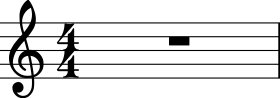

In [44]:
r.show()

…but if you try to hear it as a ‘midi’ file, don’t expect to be overwhelmed.
A Rest is an object type that does not have .pitch on it, so naturally it doesn’t have .pitch.accidental either:

In [45]:
r.pitch

AttributeError: 'Rest' object has no attribute 'pitch'

One last thing: notice that we never used a variable name called “note” to store a note.Note object. **Don’t do this. If you type something like this (don’t type this if you want to continue typing along with the user guide):**

note = note.Note("C#3")

Well now you’re in a bind. You’ve got your Note object stored as note, but we need the note module in order to create new Note objects and now you have no way of getting it. (this is the problem that “polluting the namespace” causes that your Python guru friend might have warned you about). So unless you’re Amadeus’s Emperor Joseph who complained that there were “too many notes,” you’re probably going to want to make more note.Note objects in the future, so don’t use note as a variable name. (The same goes with pitch, scale, key, clef, and so on. You’ll see me use variable names like myNote and myClef to avoid the problem).

Okay, now you have the basics of Note objects down, let’s go on to <a href="http://web.mit.edu/music21/doc/usersGuide/usersGuide_03_pitches.html#usersguide-03-pitches"> Chapter 3: Pitches and Durations. </a>

<h1> User’s Guide, Chapter 3: Pitches, Durations, and Notes again </h1>

Now that you’ve made a couple of Note objects, it’s time to dig a little deeper into what makes a Note really a Note, namely, music21.pitch, and music21.duration objects.

<h2> The Pitch object </h2>

Since we’ve already covered Note objects, Pitch objects will be a breeze. Just like how the Note object is found in the note module, the Pitch object is found in the pitch module.

Let’s create a Pitch. Like we did with Notes, just class the class with a note name, such as B with the optional symbols for sharp or flat, (# or - respectively).

You can put an octave number after the name (4 = low treble clef), but you don’t have to:

In [46]:
# from music 21 import *
# already did that above! :-)

p1 = pitch.Pitch('b-4')

Here we’ll use a more abstract variable name, p1 for our first Pitch, just in case we change the pitch later (via .transpose() or something else).

Just like we saw with Notes there are a lot of attributes (a.k.a. properties; we’ll use the term interchangeably for a bit before we talk about the difference) and methods that describe and change pitches. The first three will be old hat from Note objects:

In [47]:
p1.octave

4

In [48]:
p1.pitchClass

10

In [49]:
p1.name

'B-'

In [50]:
p1.accidental.alter

-1.0

Here are two more that you can use. The first is pretty self-explanatory. The second gives the value of the Pitch in the older, “MIDI” representation that is still in use today. It’s a number between 0 and 127 where middle C (C4) is 60 and C#4/Db4 is 61, B3 is 59, etc.

In [51]:
p1.nameWithOctave

'B-4'

In [52]:
p1.midi

70

Most of these attributes can be changed (they are “settable properties” in Python speak).
When an attribute is set, the Pitch object changes whatever is necessary to reflect the new value:

In [53]:
p1.name='d#'
p1.octave = 3
p1.nameWithOctave

'D#3'

And our familiar .transpose() method also appears on Pitch as well. Remember that p1 is now a D#:

In [54]:
p2 = p1.transpose('M7')
p2

<music21.pitch.Pitch C##4>

Notice that at the command line, just printing the variable name gives you the representation <music21.pitch.Pitch C##4>. You can also get this by typing repr(p2).
So, there’s really nothing new about Pitch objects that you didn’t already know from learning about Notes. So why the two different objects? It turns out, they are so similar because actually every Note object has a Pitch object inside it (like the monster in Alien but more benign). Everything that we did with the note.Note object, we could do with the note.Note.pitch object instead:

In [55]:
csharp = note.Note('C#4')
csharp.name

'C#'

In [56]:
csharp.pitch.name

'C#'

In [57]:
csharp.octave

4

In [58]:
csharp.pitch.octave

4

But pitch objects have a lot more to offer for more technical working, for instance, Pitch objects know their names in Spanish:

In [59]:
csharp.pitch.spanish

'do sostenido'

Notes don’t:

In [60]:
csharp.spanish

AttributeError: 'Note' object has no attribute 'spanish'

Here are some other things you can do with Pitch objects. Get the sharp printed nicely:


In [61]:
print(csharp.pitch.unicodeName)

C♯


Get some enharmonics – these are methods, so we add () to them:

In [62]:
print( csharp.pitch.getEnharmonic() )
print( csharp.pitch.getLowerEnharmonic() )

D-4
B##3


By the way, you know how we said that you shouldn’t have a variable named pitch because there’s already a module named pitch. You might wonder why Note objects can have an attribute named pitch without causing any problems. It’s because the .pitch attribute is always attached to a Note , so it’s never used without a prefix of some sort (in this case, csharp.pitch ), and that’s enough to prevent any trouble.

So far, it looks like Pitch objects can do everything Note objects can do and more. So why do we need Note objects? It’s because they also have Duration attributes, as we’ll see in the next section. Without a Duration attribute, you cannot put an object into a Measure or show it on your screen.

<h2> Carving time with Duration objects </h2>

For a Note to occupy musical space, it has to last a certain amount of time. We call that time the Note’s Duration. Duration objects are ubiquitous in music21. Nearly all objects have, or can have, a Duration. A Duration object can represent just about any time span.
Duration objects are best used when they’re attached to something else, like a Note or a Rest, but for now, let’s look at what we can do with them on their own.
Duration objects reside in the duration module. When you create a Duration object, you can say what type of duration you want it to be when you create it.
Here we’ll create the duration of a half note:

In [63]:
halfDuration = duration.Duration('half')

The string “half” is called the “type” of the Duration. Music21 Durations use the common American duration types: “whole”, “half”, “quarter”, “eighth”, “16th”, “32nd”, “64th”. Note that for durations shorter than an eighth note, we use numbers instead of spelling out the whole name of the Duration type. Music21 also supports less commonly used types such as “breve” (2 whole notes), “longa” (4 whole notes), and “maxima” (8 whole notes) and on the other side, “128th”, “256th”, etc. down to “2048th” notes. (Some of these very long and very short notes can’t be displayed in many musical notation systems, but it’s good to know that we’re ready when they are).

The other standard way of creating a Duration is by passing it a number when it is created. That number represents how many quarter notes long it is. So we could have created our half note Duration by saying 2 or 2.0. But we can also create Durations that aren’t exactly “whole”, “half”, “quarter”, etc. Let’s create a dotted quarter note, which is 1.5 quarter notes long:

In [64]:
dottedQuarter = duration.Duration(1.5)

As with the Pitch and Note objects we’ve already seen, there are a bunch of attributes that Duration objects have. The most important one is .quarterLength. The quarterLength of our dottedQuarter variable is of course 1.5: we set it to be. But just as importantly, the halfDuration object also has its quarterLength set:

In [65]:
dottedQuarter.quarterLength

1.5

In [66]:
halfDuration.quarterLength

2.0

The .type attribute tells you what general type of Duration you have:

In [67]:
halfDuration.type

'half'

In [68]:
dottedQuarter.type

'quarter'

The type attribute cannot be everything that describes the Duration, there has to be some place where music21 keeps track of the fact that the dottedQuarter variable has a dot (otherwise it wouldn’t have a quarterLength of 1.5). You’ll find the attribute called .dots:

In [69]:
halfDuration.dots

0

In [70]:
dottedQuarter.dots

1

The attributes of dots, type, and quarterLength are actually special attributes called “properties”. A property is an attribute that is smart in some way. Let’s change the number of dots on our dottedQuarter object and see what happens to the quarterLength property:

In [71]:
dottedQuarter.dots = 2
dottedQuarter.quarterLength

1.75

In [72]:
dottedQuarter.dots = 4
dottedQuarter.quarterLength

1.9375

Or let’s change the quarterLength of the dottedQuarter and see what happens to the type and dots:

In [73]:
dottedQuarter.quarterLength = 0.25
dottedQuarter.type

'16th'

In [74]:
dottedQuarter.dots

0

QuarterLengths are so important to music21 that we’ll sometimes abbreviate them as qL or qLs. Almost everything that is measured in music21 is measured in qLs.
Music21 can also deal with other quarterLengths such as 0.8, which is 4/5ths of a quarter note, or 1/3 which is an eighth note triplet.
Just be careful when creating triplets, because of a weird Python 2 quirk that makes it so that if you divide two integers with “/” you always get back just the integer part of the number, so 8/3 is 2, since 8/3 is 2.66666… and the integer part is 2. I will use “//” in this example, since “//” appears in both Python 2 and Python 3 and is equivalent to Python 2’s “/”

In [75]:
8 //3

2

In [76]:
1//3

0

To get the number you probably want either use Python 3 or make sure that at least one of the numbers you are dividing is a float. So:

In [77]:
8.9/3.0

2.966666666666667

In [78]:
1.0/3

0.3333333333333333

You can go ahead and make a Triplet or other <a href = "http://web.mit.edu/music21/doc/moduleReference/moduleDuration.html#music21.duration.Tuplet"> Tuplet </a> now, but we’ll get to Triplets later.

<h2> Back to Notes </h2>

So now you can see the advantage of working with Note objects: they have both a .pitch attribute, which contains a Pitch object, and a .duration attribute, which contains a Duration object. The default Pitch for a Note is C (meaning C4) and the default Duration is 1.0, or a quarter note.

In [79]:
n1 = note.Note()
n1.pitch

<music21.pitch.Pitch C4>

In [80]:
n1.duration

<music21.duration.Duration 1.0>

But we can play around with them:

In [81]:
n1.pitch.nameWithOctave = 'E-5'
n1.duration.quarterLength = 3.0

and then the other properties change accordingly:

In [82]:
n1.duration.type

'half'

In [83]:
n1.duration.dots

1

In [84]:
n1.pitch.name

'E-'

In [85]:
n1.pitch.accidental

<accidental flat>

In [86]:
n1.octave

5

We already said that some of the attributes of Pitch can also be called on the Note object itself. The same is true for the most important attributes of Duration:

In [87]:
n1.name

'E-'

In [88]:
n1.quarterLength

3.0

Let’s change the quarterLength back to 1.0 for now:

In [89]:
n1.quarterLength = 1.0

Notes can do things that neither Pitch or Duration objects can do. For instance, they can have lyrics. Let’s add some lyrics to Notes. You can easily set Lyric objects just by setting the lyric property. (For reference, the lyric attribute is actually an attribute of GeneralNote, which is a “base class” from which the Note class “inherits”. In other words, the Note class gains the lyric attribute from GeneralNote. But that’s not too important.)

In [90]:
otherNote = note.Note("F6")
otherNote.lyric = "I'm the Queen of the Night!"

But let’s do something more complex. Here I add multiple lyrics to n1 using the Note's addLyric() method. And instead of adding a simple String, I’ll add as a lyric the name of the note itself and its pitchClassString.

In [91]:
n1.addLyric(n1.nameWithOctave)
n1.addLyric(n1.pitch.pitchClassString)

Finally, lets put the quarterLength of the note as a string with a preface “QL: “:


In [92]:
n1.addLyric('QL: %s' % n1.quarterLength)

The format ‘QL: %s’ says to put the first thing outside the quotes in place of %s as a string (the “s” in %s means to make it a string. Remember that .quarterLength is not a string, but a float).
As it should be becoming clear, we can always check our work with the show() method.

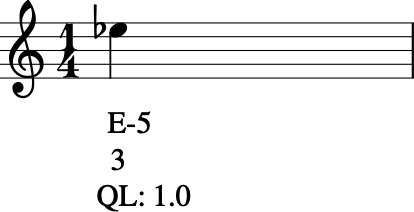

In [93]:
n1.show()

If we now edit the quarterLength property we can still change the Note’s Duration. But because we already set the lyric to show “QL: 1.0, it won’t be changed when we .show() it again in the following example.

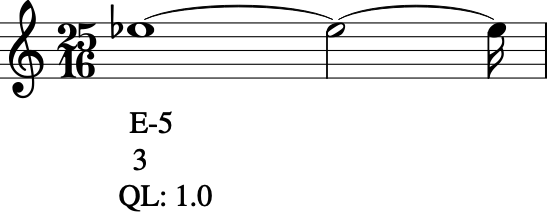

In [94]:
n1.quarterLength = 6.25
n1.show()

There many more things we can do with a Note object, but I’m itching to look at what happens when we put multiple Notes together in a row. And to do that we’ll need to learn a bit about the topic of <a href = "http://web.mit.edu/music21/doc/usersGuide/usersGuide_04_stream1.html#usersguide-04-stream1"> Chapter 4: Streams. </a>